Subquestion 3: Effect of remote and hybrid working on peak-hour / off peak-hour demand

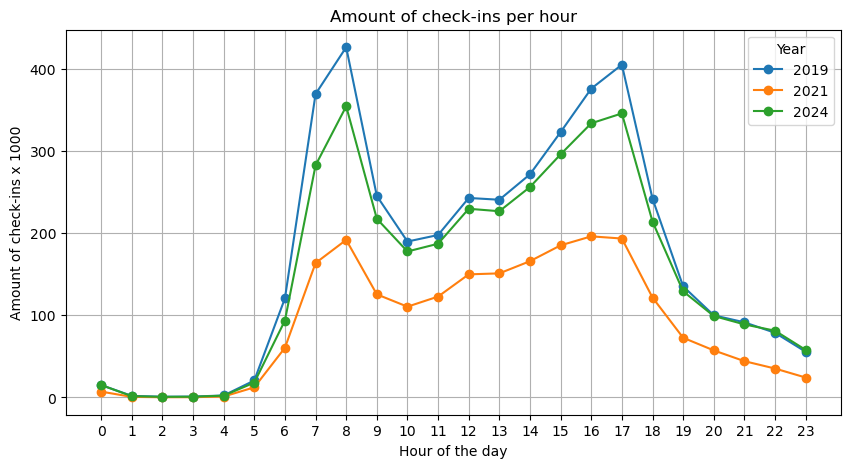

In [ ]:
#Import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt

#Path to datafolder, , sep=';' is necessary to ensure 'Hour' and 'Series 1' end up in different columns
df_2019 = pd.read_csv(r"c:\Users\stepk\OneDrive - Delft University of Technology\TIL\TIL 6022\groep 24 data\q3_2019_workingdays_allmonths.csv", sep=';')
df_2021 = pd.read_csv(r"c:\Users\stepk\OneDrive - Delft University of Technology\TIL\TIL 6022\groep 24 data\q3_2021_workingdays_allmonths.csv", sep=';')
df_2024 = pd.read_csv(r"c:\Users\stepk\OneDrive - Delft University of Technology\TIL\TIL 6022\groep 24 data\q3_2024_workingdays_allmonths.csv", sep=';')

#renaming column names
for df in [df_2019, df_2021, df_2024]:
    df.columns = ['hour', 'check-ins']
    #Ensure column hour is read as integer
    df['hour'] = df['hour'].astype(int)
    #In the CSV numbers have comma's instead of dots
    df['check-ins'] = df['check-ins'].str.replace(',', '.').astype(float)

#Plot graph
plt.figure(figsize=(10, 5))

#2019
hourly_2019 = df_2019.groupby('hour')['check-ins'].sum().reset_index()
plt.plot(hourly_2019['hour'], hourly_2019['check-ins'], marker='o', label='2019')

#2021
hourly_2021 = df_2021.groupby('hour')['check-ins'].sum().reset_index()
plt.plot(hourly_2021['hour'], hourly_2021['check-ins'], marker='o', label='2021')

#2024
hourly_2024 = df_2024.groupby('hour')['check-ins'].sum().reset_index()
plt.plot(hourly_2024['hour'], hourly_2024['check-ins'], marker='o', label='2024')

#Plot table
plt.title("Amount of check-ins per hour")
plt.xlabel("Hour of the day")
plt.ylabel("Amount of check-ins x 1000")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title="Year")
plt.show()

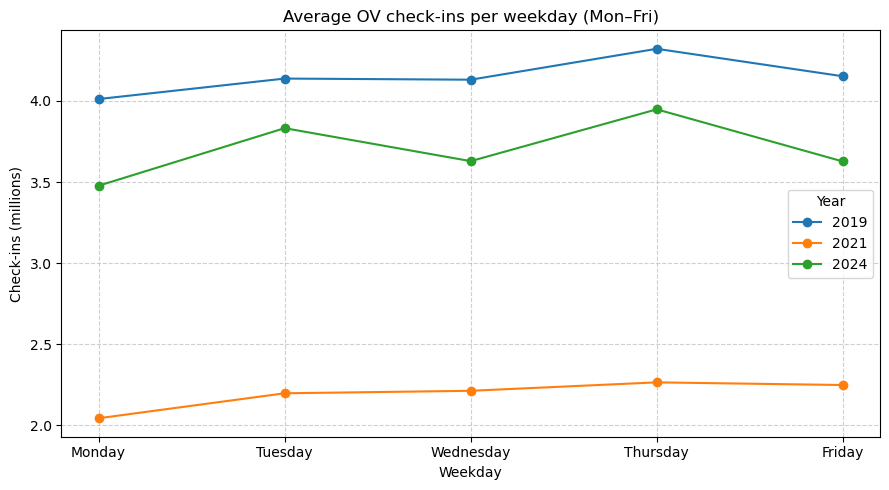

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_2019 = r"/Users/bentedegen/Desktop/tilprogramming/groep24/Subquestion 3/2019 check-ins ov per day.csv"
file_2021 = r"/Users/bentedegen/Desktop/tilprogramming/groep24/Subquestion 3/2021 check-ins ov per day.csv"
file_2024 = r"/Users/bentedegen/Desktop/tilprogramming/groep24/Subquestion 3/2024 check-ins ov per day.csv"

months   = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month_no = {m:i+1 for i,m in enumerate(months)}
workdays = ['Monday','Tuesday','Wednesday','Thursday','Friday']

def load_year(csv_path, year):
    """
    Read a 'day x month' csv and return long rows with (year, weekday, checkins).
    """
    df = pd.read_csv(csv_path, sep=None, engine='python', encoding="utf-8-sig")

    # Ensure numeric
    for m in months:
        if m in df.columns:
            df[m] = pd.to_numeric(df[m], errors='coerce')
    df['Day'] = pd.to_numeric(df['Day'], errors='coerce')

    # Wide -> long
    long = df.melt(id_vars='Day',
                   value_vars=[c for c in months if c in df.columns],
                   var_name='Month', value_name='checkins').dropna(subset=['checkins'])

    # Build dates + weekday
    long['Year']  = year
    long['Month'] = long['Month'].map(month_no)
    long['Date']  = pd.to_datetime(long[['Year','Month','Day']], errors='coerce')
    long = long.dropna(subset=['Date'])
    long['Weekday'] = long['Date'].dt.day_name()

    # Keep Mon–Fri
    return long[long['Weekday'].isin(workdays)][['Year','Weekday','checkins']]

# Load and combine
d2019 = load_year(file_2019, 2019)
d2021 = load_year(file_2021, 2021)
d2024 = load_year(file_2024, 2024)
all_days = pd.concat([d2019, d2021, d2024], ignore_index=True)

# Average check-ins per weekday per year (Mon–Fri only) ---
avg = (all_days.groupby(['Weekday','Year'])['checkins']
       .mean()
       .unstack('Year')
       .reindex(workdays))

# plot
plt.figure(figsize=(9,5))
for yr in avg.columns:
    plt.plot(workdays, avg[yr].values, marker='o', label=str(yr))
plt.title("Average OV check-ins per weekday (Mon–Fri)")
plt.xlabel("Weekday")
plt.ylabel("Check-ins (millions)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Year")
plt.tight_layout()
plt.show()
